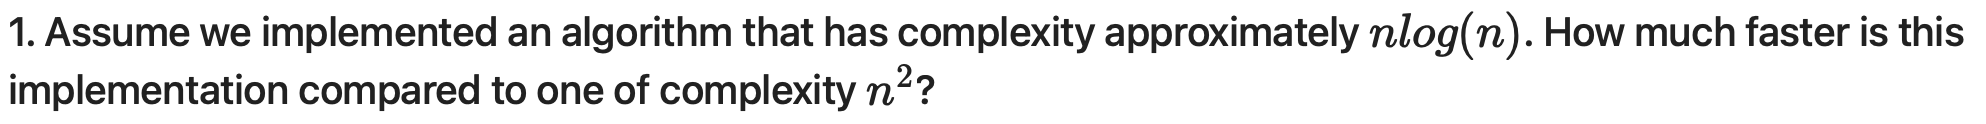 

Se observa que n log(n) es significativamente más rápido que n˄2


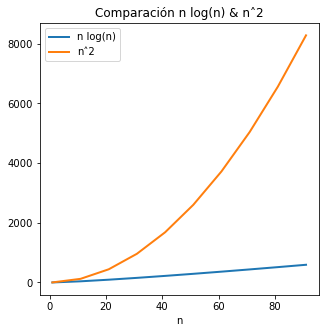

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import math

# Se crea nuevo data frame (df) vacío
x = pd.DataFrame()

# Se crea nueva columna del df que tenga los valores de 'n'
x['n'] = np.arange(1, 100, 10)

# Se crea nueva columna del df que tenga los valores de nlog(n)
x['n log(n)'] = x['n'] * np.log2(x['n'])

# Se crea nueva columna del df que tenga los valores de n˄2
x['n˄2'] = np.power(x['n'], 2)

# Se grafican los valores de ambas funciones 
x.plot(x = 'n', lw = 2, figsize = (5, 5), title = 'Comparación n log(n) & n˄2')

print('Se observa que n log(n) es significativamente más rápido que n˄2')


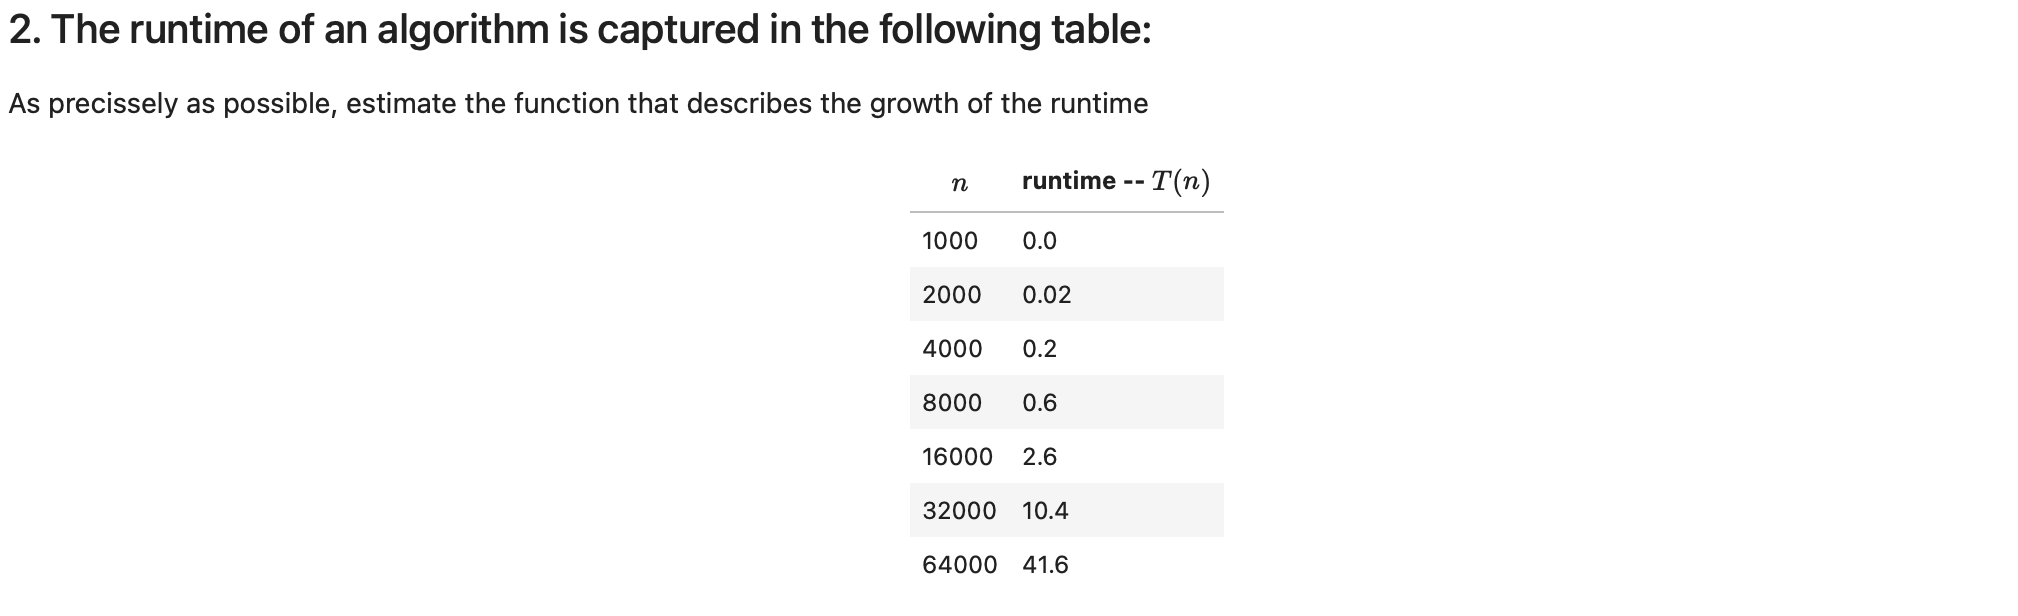

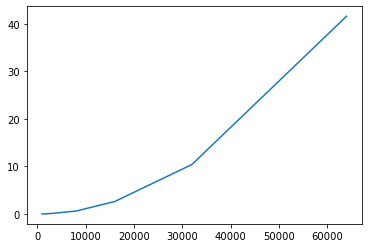

In [10]:
df2 = pd.DataFrame()

df2[0] = [1000, 2000, 4000, 8000, 16000, 32000, 64000]
df2[1] = [0.0, 0.02, 0.2, 0.6, 2.6, 10.4, 41.6]

# Plotting the data on the table
plt.plot(df2[0], df2[1])

Linea de mejor ajuste calculada en Desmos:


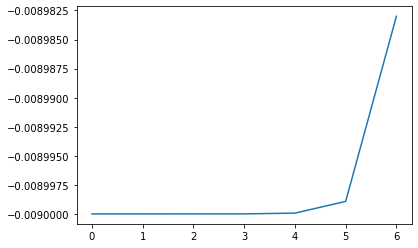

In [11]:
print('Linea de mejor ajuste calculada en Desmos:')
# plotting the best-fit
plt.plot((1.02*(10**-8)) * (df2[1]**1.99) - 0.009)

Datos obtenidos en Desmos:

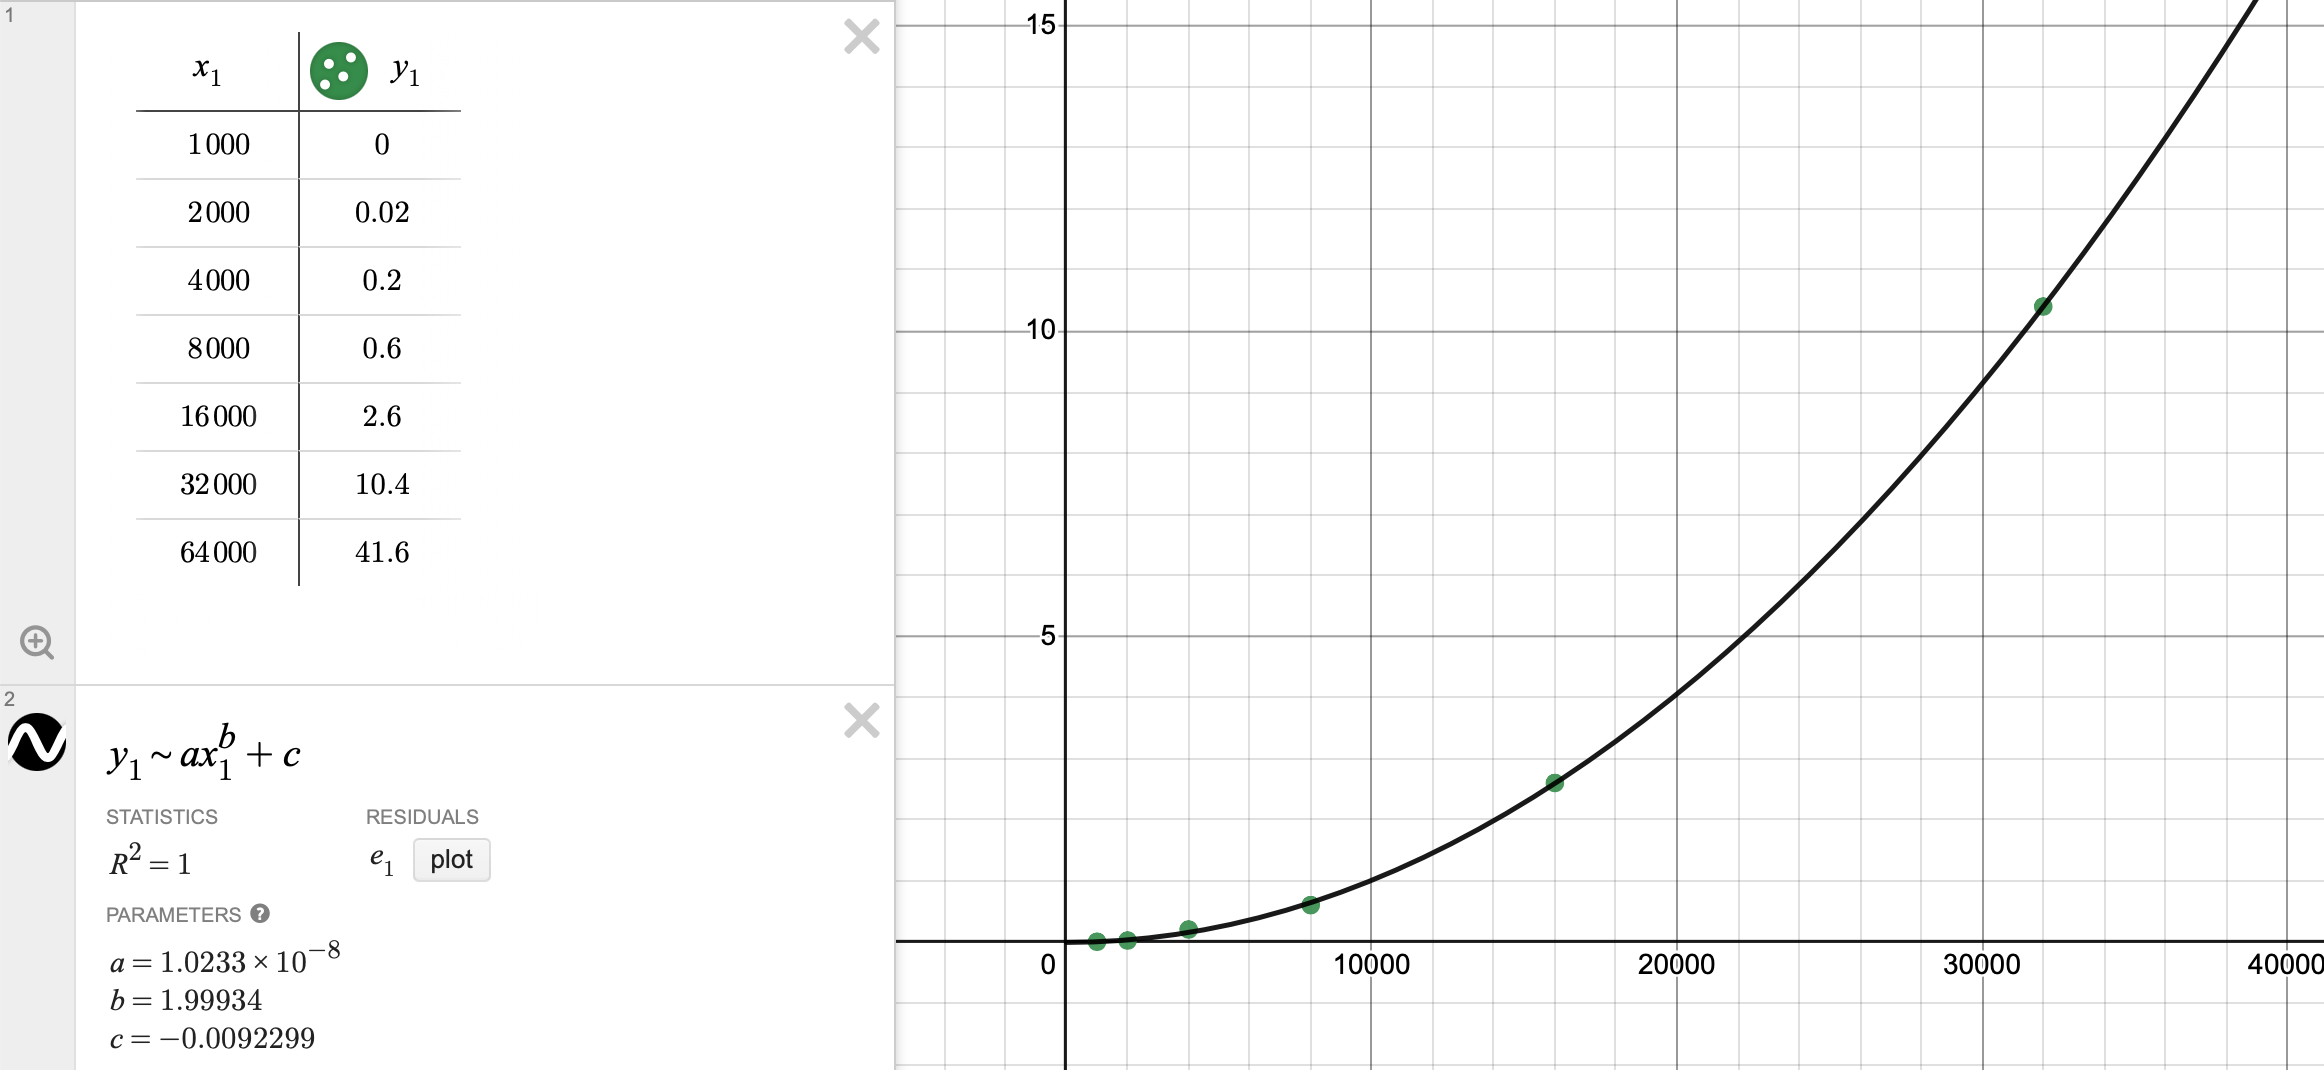

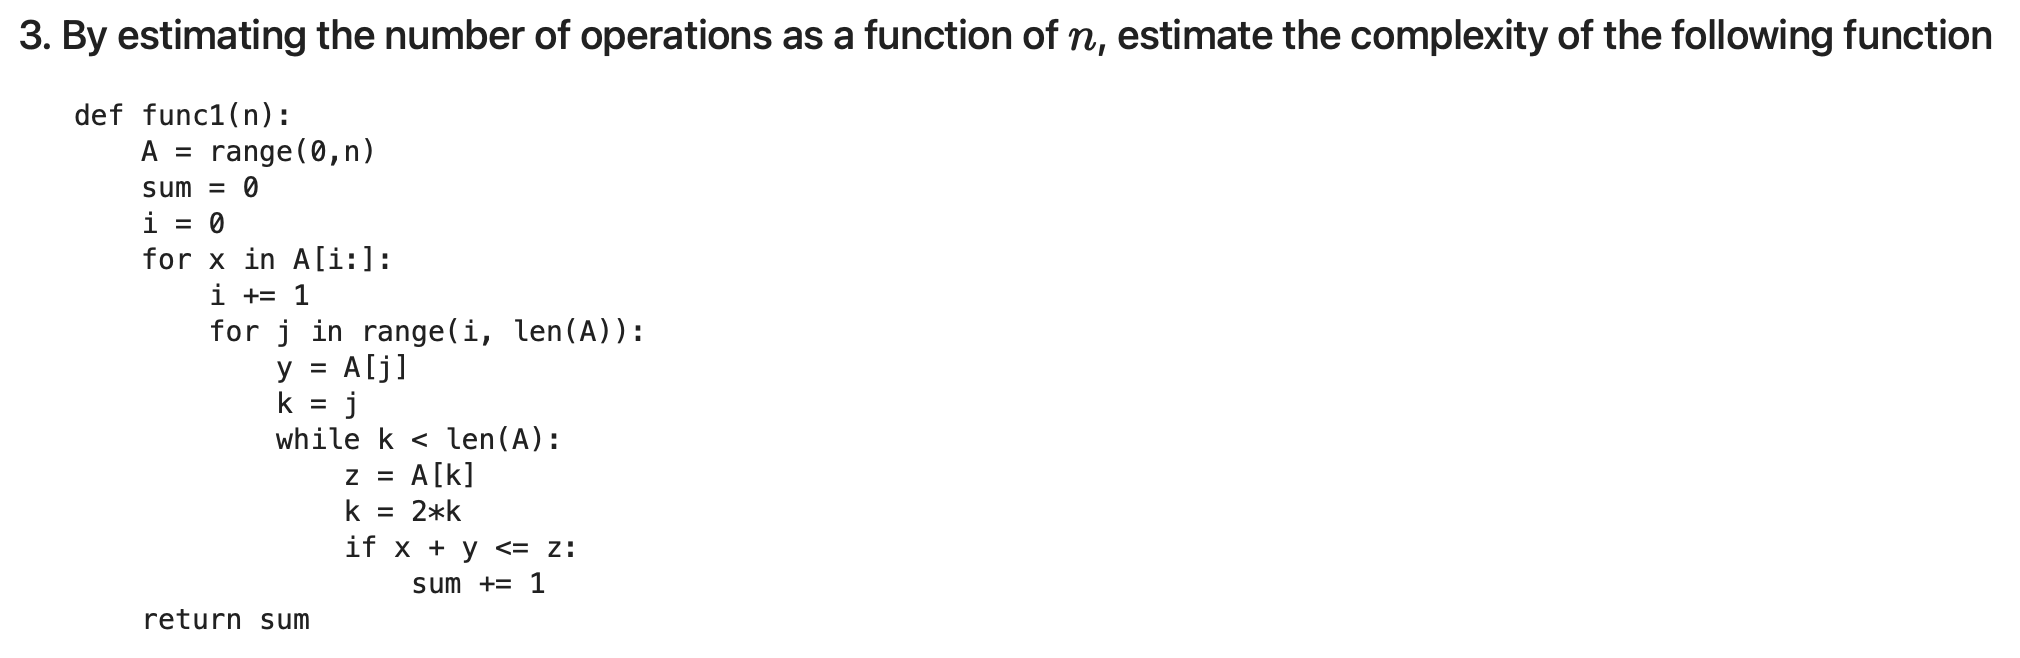

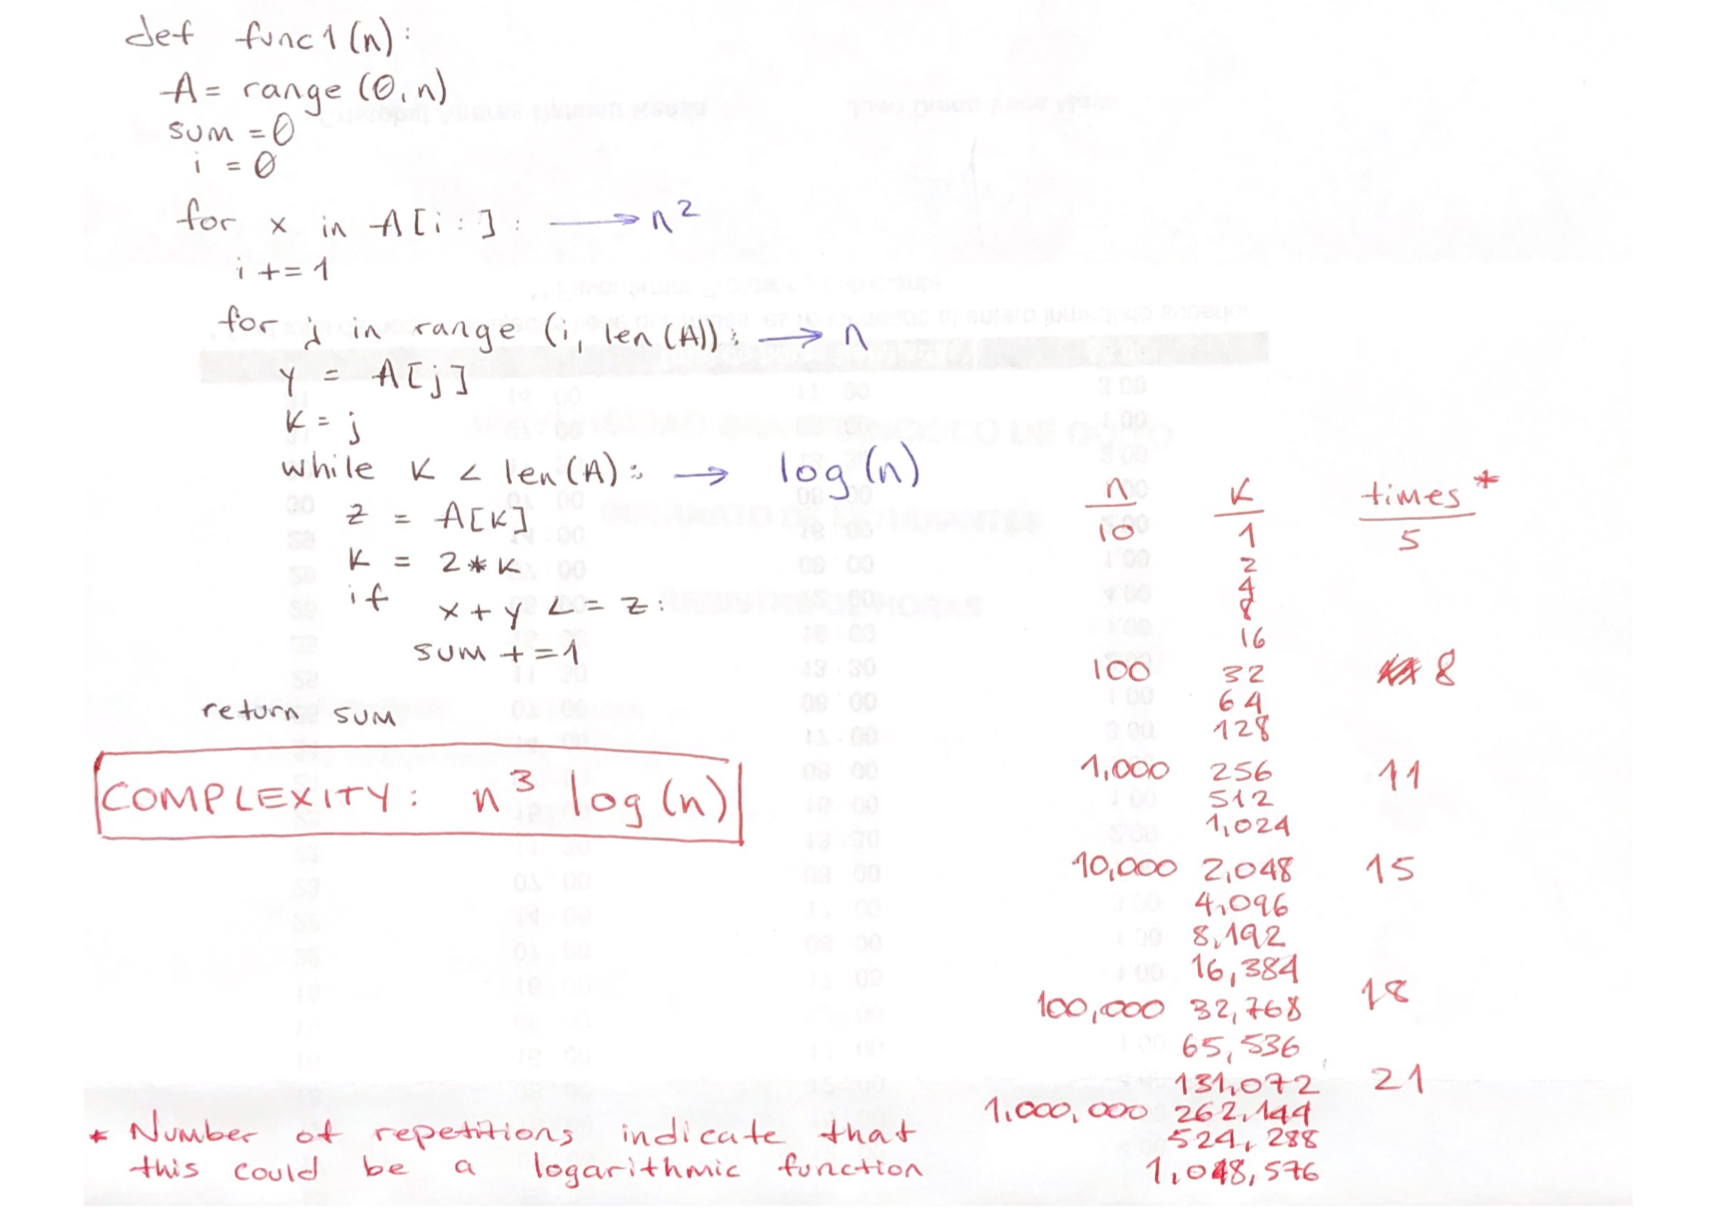

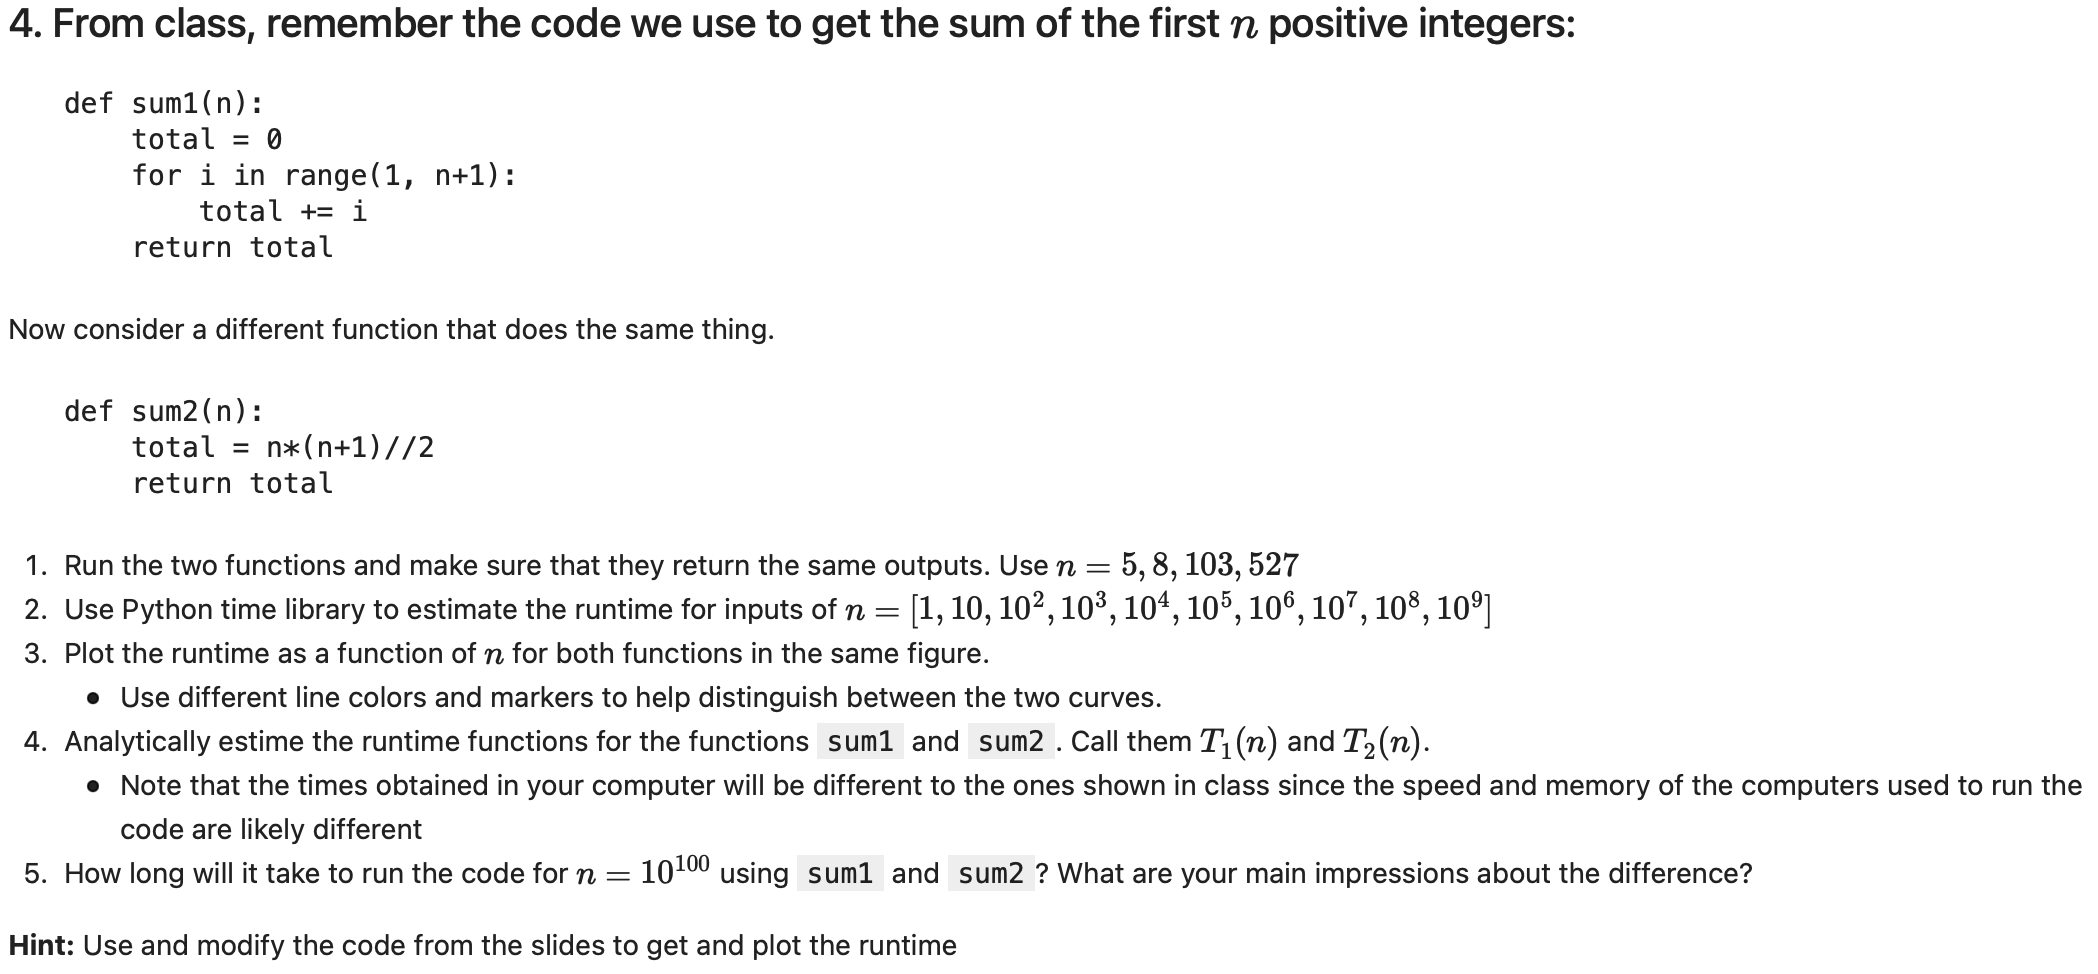

## 4.1

In [4]:
from time import time

# Se crea función para poder aplicar el decorador que brinde el tiempo de ejecución
def temporizador(func):
    def wrap_function(*args, **kwargs):
        time1 = time()*10**6 # multiplicación para que el tiempo se presente en nano-segundos
        result = func(*args, **kwargs) 
        time2 = time()*10**6 # multiplicación para que el tiempo se presente en nano-segundos
        return result, time2 - time1
    return wrap_function

@temporizador
def sum1(n):
    total = 0
    for i in range(1, n + 1):
        total += i
    return total


@temporizador
def sum2(n):
    total = n * (n + 1) // 2
    return total

# Presentación de los resultados de obtenidos por cada función y comprobación de que ambas funciones...
# arrojen los mismos datos
print('sum1\tsum2\t\tComprobación')
print('{}\t{}\t\t{}'.format(sum1(5)[0], sum2(5)[0], sum1(5)[0] == sum2(5)[0]))
print('{}\t{}\t\t{}'.format(sum1(8)[0], sum2(8)[0], sum1(8)[0] == sum2(8)[0]))
print('{}\t{}\t\t{}'.format(sum1(103)[0], sum2(103)[0],sum1(103)[0] == sum2(103)[0]))
print('{}\t{}\t\t{}'.format(sum1(527)[0], sum2(527)[0], sum1(527)[0] == sum2(527)[0]))

sum1	sum2		Comprobación
15	15		True
36	36		True
5356	5356		True
139128	139128		True


## 4.2

In [6]:
import matplotlib.pyplot as plt

def plotting_2_functions(x, y1, y2, label1, label2):
    plt.plot(x, y1, c = 'b', label = label1)
    plt.plot(x, y2, c = 'r', label = label2)
    plt.legend(loc = 'upper left')
    plt.xlabel('n')
    plt.ylabel('Tiempo')
    plt.show()
    
# se definen los arrays que van a contener la información de resultados de las sumas, el tiempo de ejecución
# y los valores que se están enviando a la función
resultados1 = []
resultados2 = []
tiempo1 = []
tiempo2 = []
valores = []

# For loop que se encarga de hacer las operaciones para todos los valores necesarios
for i in range(9):
    
    # Se almacenan los valores de 'n' para graficarlos posteriormente
    valor = i * 10**i
    valores.append(valor)
    
    # Función sum1()
    res1 = sum1(valor)
    resultados1.append(res1[0])
    tiempo1.append(res1[1])
    
    # Función sum2()
    res2 = sum2(valor)
    resultados2.append(res2[0])
    tiempo2.append(res2[1])
    #print(resultados2[i][0])

# Impresión de resultados
print('Runtimes:')
print('Sum1() --- Sum2()')    
combinacion = "\n".join("{} --- {}".format(x, y) for x, y in zip(tiempo1, tiempo2))
print(combinacion)

Runtimes:
Sum1() --- Sum2()
2.0 --- 1.0
1.0 --- 1.0
11.0 --- 1.0
192.0 --- 0.0
2711.75 --- 0.0
32694.0 --- 2.0
401324.0 --- 4.0
4672366.25 --- 3.75
55590912.0 --- 3.25


## 4.3

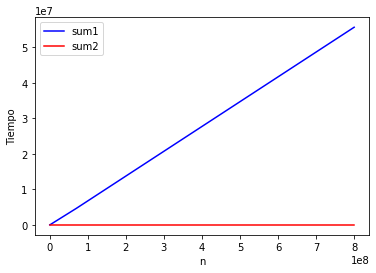

In [7]:
# Se utiliza función previamente mostrada para imprimir los tiempos de ejecución de ambas funciones 
plotting_2_functions(valores, tiempo1, tiempo2, 'sum1', 'sum2')

## 4.4


tiempo sum1():  [2.0, 1.0, 11.0, 192.0, 2711.75, 32694.0, 401324.0, 4672366.25, 55590912.0]
tiempo sum2():  [1.0, 1.0, 1.0, 0.0, 0.0, 2.0, 4.0, 3.75, 3.25]


Text(0, 0.5, 'Tiempo')

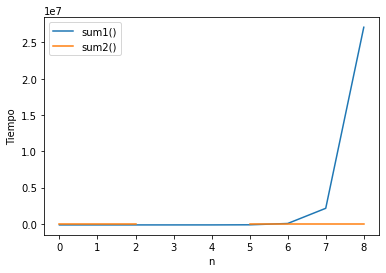

In [13]:
import numpy as np
import math

print('tiempo sum1(): ', tiempo1)
df3 = pd.DataFrame()
df3[0] = tiempo1
plt.plot(0.49*df3[0] - 140713, label = 'sum1()')

print('tiempo sum2(): ', tiempo2)
df3[1] = tiempo2
plt.plot(0.12*np.log(df3[1]) + 0.64, label = 'sum2()')
plt.legend(loc = 'upper left')
plt.xlabel('n')
plt.ylabel('Tiempo')

Ecuación sum1( ): $T_{1}(n) = 0.49x - 140,713$

Ecuación sum2( ): $T_{2}(n) = 0.2 log(x) + 0.64$

#### Desmos:
##### Sum(1):
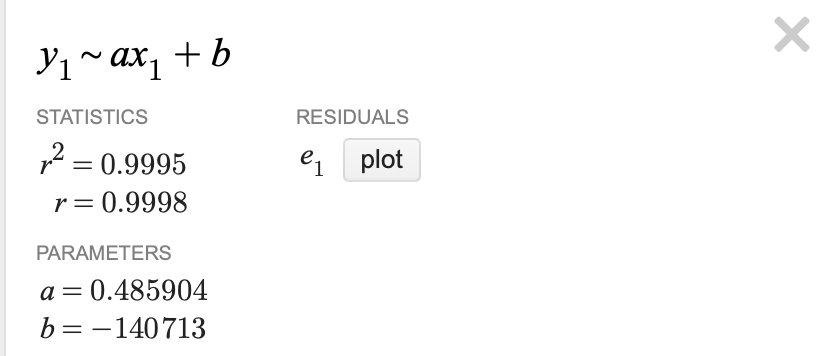

##### Sum(2):
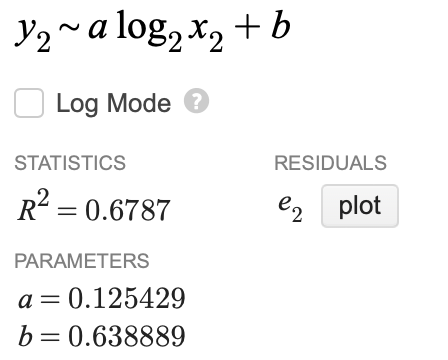

## 4.5

Time taken to run $10^{100}$:

- $T_1{(n)} = 0.49(10^{100}) - 140,713$


- $T_1{(n)} = 4.9 * 10^{99} nanoseconds$


- $T_2{(n)} = 0.2 log(10^{99}) + 0.64$


- $T_2{(n)} = 20.44 nanoseconds$

It can be seen that the difference is abysmal, and this calculation shows the importance of verifying an algorithm complexity, as for big inputs, the runtime difference can be huge.

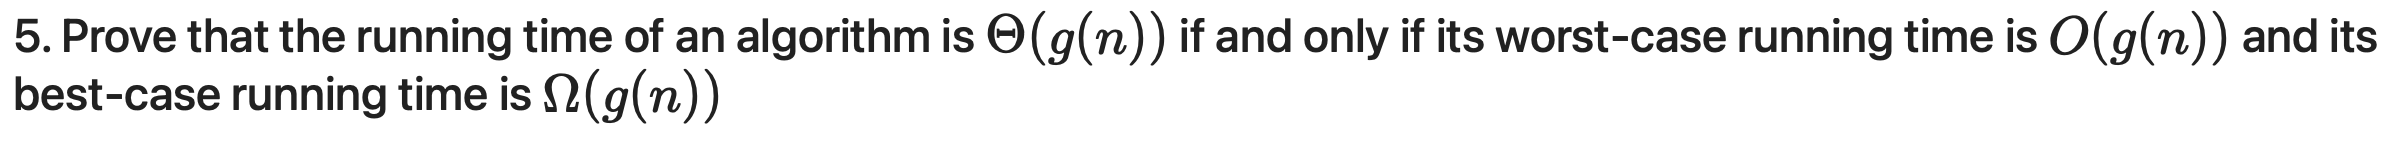

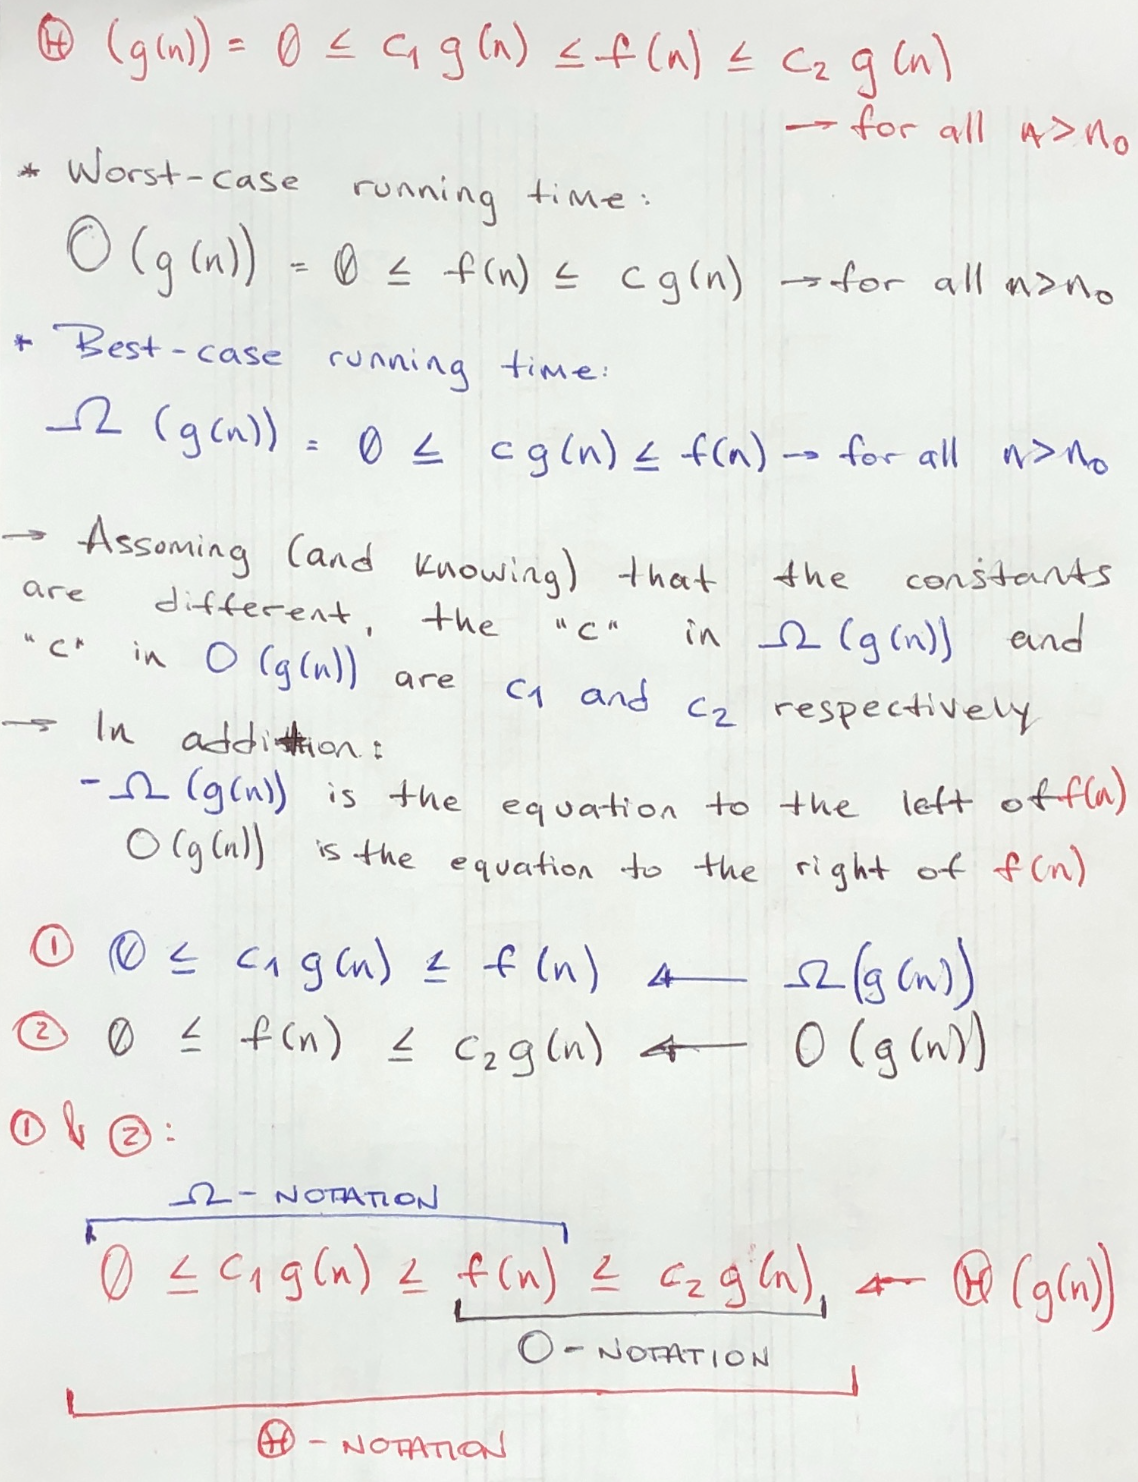

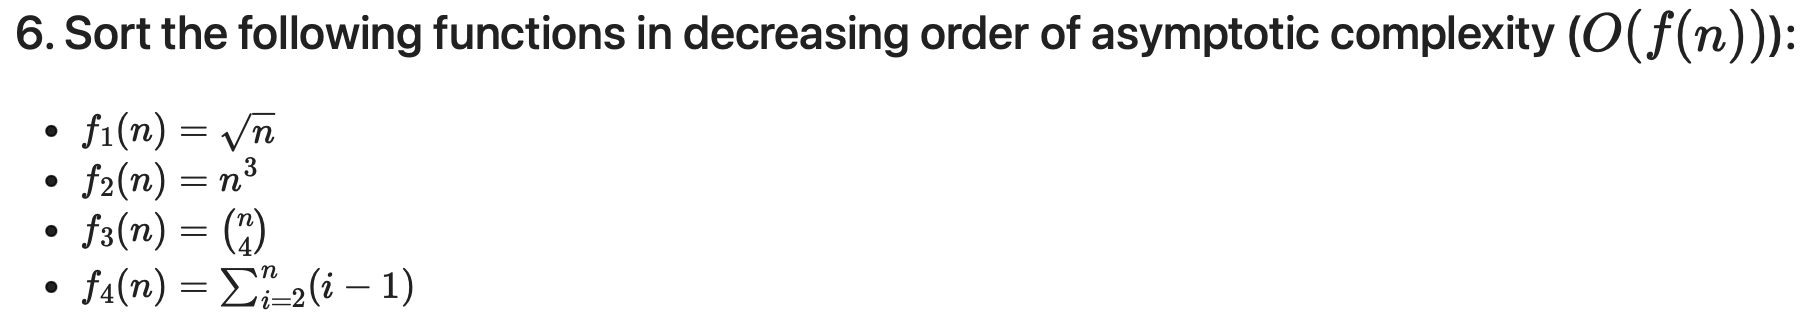

El gráfico demuestra que, siguiendo la complejidad $O(f(n))$, el orden decreciente de complejidad asintótica es:

1. $f_{2}(n) = n^{3}$ ---> azul


2. $f_{3}(n) = {n \choose 4}$ ---> verde (para n > 6.797)


3. $f_{4}(n) = \sum_{i = 2}^n (i - 1)$ ---> negro (para n > 6.797)


4. $f_{1}(n) = \sqrt n$ ---> rojo

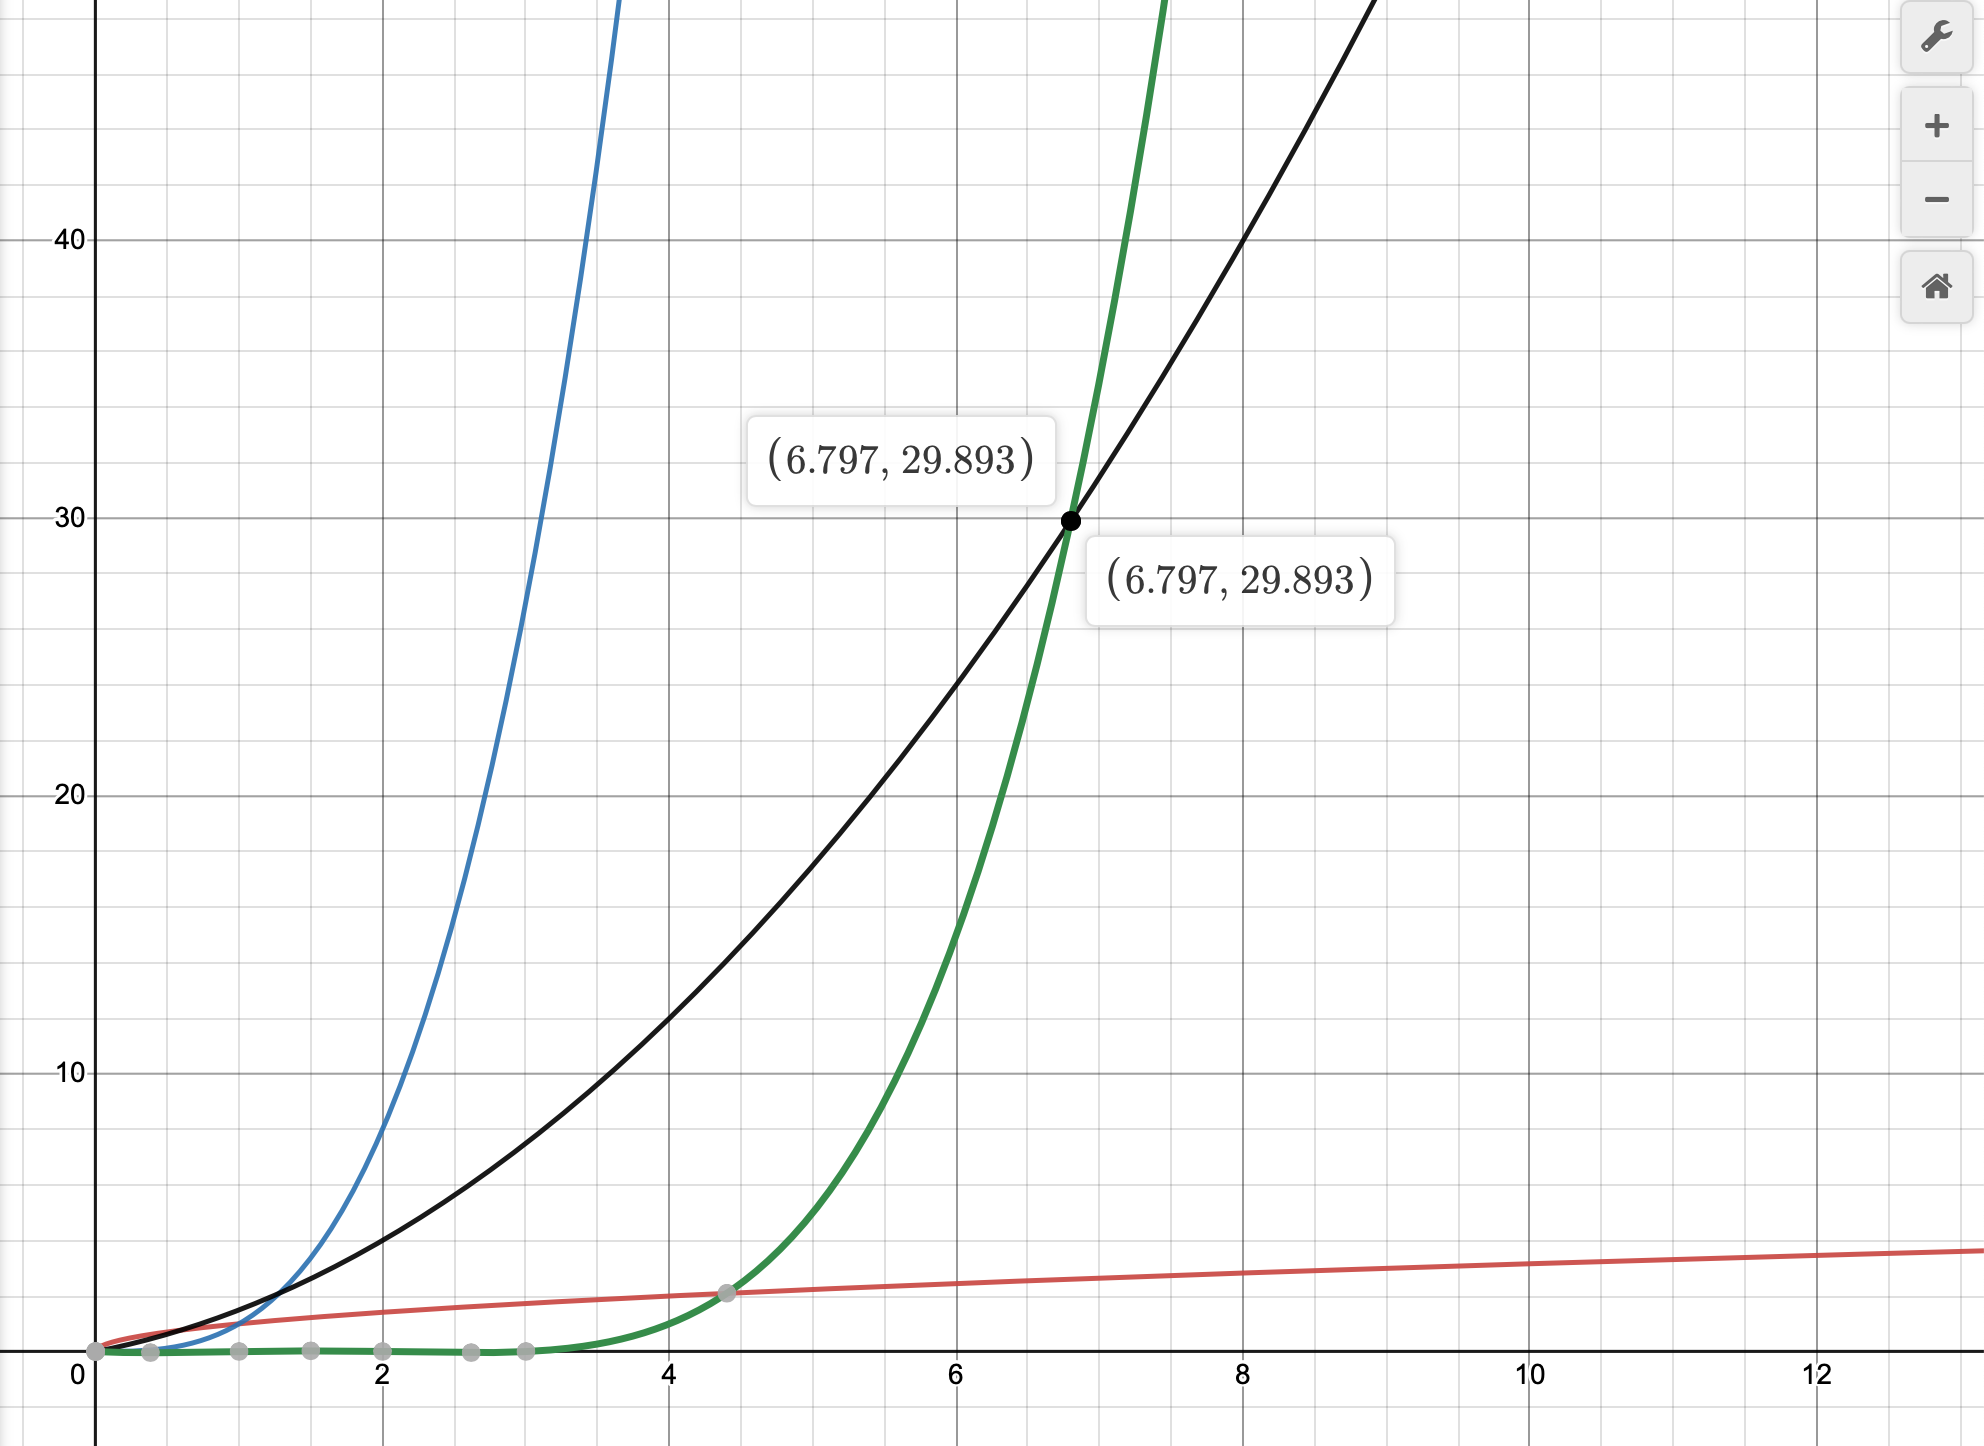

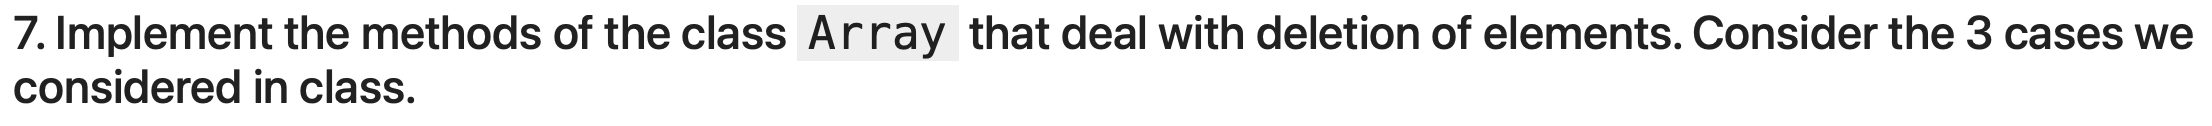

In [26]:
# Código mostrado en clase por Alejandro Proaño con ciertas modificaciones

import ctypes

class Array(object):
    """
    Implementation of the array data structure
    """

    def __init__(self, n, values=None):
        self.l = 0
        self.n = n
        self.array = self._create_array(self.n)
        if values:
            self.initialize_array(values)  
    
    def _create_array(self, n):
        """
        Creates a new array of capacity n
        """
        return (n * ctypes.py_object)()
    
    def __getitem__(self, item_index):
        """
        Return element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        try:
            x = self.array[item_index]
        except ValueError:
            x = None
        return x
    
    def __setitem__(self, item_index, item):
        """
        Set element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        self.array[item_index] = item
        self.l += 1
    
    def initialize_array(self, values):
        """
        Initialize array
        """
        if self.n != len(values):
            raise ValueError("element count different than capacity")
        for item in values:
            self.array[self.l] = item
            self.l += 1
            
    def list_array(self):
        """
        List elements of the array
        using list comprehension
        """
        return ", ".join(str(x) if x is not None else '_' for x in self)

    def list_array2(self):    
        y = []    
        for x in self:
            if x is not None:
                y.append(str(x))
            else:
                y.append('_')
        return ", ".join(y)
    
    def insert_to_tail(self, item):
        """
        Add new item to the tail of the array
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        self.array[self.l] = item
        self.l += 1
        
    def insert_to_head(self, item):
        """
        Add new item to the beginning of the array
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        i = self.l
        while (i > 0):
            self.array[i] = self.array[i-1]
            i -= 1
        self.array[0] = item
        self.l += 1
    
    def insert(self, index, element):
        """
        implementation of insert
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        if (index < 0) or (index > self.l):
            raise IndexError('index out of range!')
        x = self.l
        while x > index:
            self.array[x] = self.array[x-1]
            x -= 1
        self.array[index] = element
        self.l += 1
        
# Implementación funciones delete_tail(), delete_head(), y delete_() (encargada de eliminar el valor de un índice)

    @temporizador
    def delete_tail(self):
        # Mensaje de error en caso de que el array esté vacío
        if self.l == 0:
            raise ValueError("Empty array!")
        
        # Se elimina el valor en el último dígito del array usando 'l', pues puede que el array no esté lleno
        self.array[self.n - 1] = None
        
        # Se actualiza el nuevo valor de 'l'
        self.l -= 1
        
    @temporizador
    def delete_head(self):
        # Mensaje de error en caso de que el array esté vacío
        if self.l == 0:
            raise ValueError("Empty array!")
        # For loop hasta el último valor del array, en el que se corren todos los valores un puesto a la izquierda
        # De esta manera, se elimina el valor del primer índice, pero no se lo deja vacío 
        for i in range(self.l + 1):
            if i == self.l - 1:
                break
            self.array[i] = self.array[i + 1]
            self.array[i + 1] = None
        
        # Se actualiza el nuevo valor de 'l'
        self.l -= 1
            
    @temporizador
    def delete(self, index):
        # Mensaje de error en caso de que el array esté vacío
        if self.l == 0:
            raise ValueError("Empty array!")
        # Mensaje de error en caso de que se quiera borrar un índice que no existe    
        if (index < 0) or (index > self.l):
            raise IndexError('index out of range!')

        # Se borra el valor que está en el índice
        self.array[index] = None
        
        # Se corren los valores a la derecha del índice un puesto a la izquierda, para no dejar el espacio ...
        # ... en blanco en la mitad del array
        x = index
        while x < self.l - 1:
            self.array[x] = self.array[x + 1]
            self.array[x + 1] = None
            x += 1
        
        # Se actualiza el nuevo valor de 'l'
        self.l -= 1   

In [27]:
# Demostración de funciones

x = Array(10)

for i in range(x.n):
    x[i] = i + 1

print('Array original: ', x.list_array())

# delete_tail()
print('\ndelete_tail():\nTime taken: {}\t\tArray: {}'.format(x.delete_tail()[1], x.list_array()))

# delete_head()
print('\ndelete_head():\nTime taken: {}\t\tArray: {}'.format(x.delete_head()[1], x.list_array()))

# delete()
print('\ndelete():')
print('Valor a eliminar: ', x[2]) 
print('Time taken: {}\t\tArray: {}'.format(x.delete(2)[1], x.list_array())) # En este caso se elimina el índice 2 (3er elemento)

Array original:  1, 2, 3, 4, 5, 6, 7, 8, 9, 10

delete_tail():
Time taken: 5.25		Array: 1, 2, 3, 4, 5, 6, 7, 8, 9, _

delete_head():
Time taken: 13.0		Array: 2, 3, 4, 5, 6, 7, 8, 9, _, _

delete():
Valor a eliminar:  4
Time taken: 15.0		Array: 2, 3, 5, 6, 7, 8, 9, _, _, _
